In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
benign=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.benign.csv')
g_c=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.gafgyt.combo.csv')
g_j=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.gafgyt.junk.csv')
g_s=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.gafgyt.scan.csv')
# g_t=pd.read_csv('/content/drive/MyDrive/iot-dataset/1/1.gafgyt.tcp.csv')
# g_u=pd.read_csv('/content/drive/MyDrive/iot-dataset/1/1.gafgyt.udp.csv')
# m_a=pd.read_csv('/content/drive/MyDrive/iot-dataset/1/1.mirai.ack.csv')
# m_sc=pd.read_csv('/content/drive/MyDrive/iot-dataset/1/1.mirai.scan.csv')
# m_sy=pd.read_csv('/content/drive/MyDrive/iot-dataset/1/1.mirai.syn.csv')
# m_u=pd.read_csv('/content/drive/MyDrive/iot-dataset/1/1.mirai.udp.csv')
# m_u_p=pd.read_csv('/content/drive/MyDrive/iot-dataset/1/1.mirai.udpplain.csv')

In [4]:
benign['type']='benign'
# m_u['type']='attack'
g_c['type']='combo'
g_j['type']='junk'
g_s['type']='scan'
# g_t['type']='attack'
# g_u['type']='attack'
# m_a['type']='attack'
# m_sc['type']='attack'
# m_sy['type']='attack'
# m_u_p['type']='attack'

In [5]:
data=pd.concat([benign,g_c,g_j,g_s],
               axis=0, sort=False, ignore_index=True)

In [6]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign


In [7]:
data.groupby('type')['type'].count()

type
benign    49548
combo     59718
junk      29068
scan      29849
Name: type, dtype: int64

In [8]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [9]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)


In [10]:
from collections import Counter
print(sorted(Counter(y).items()))

[('benign', 29068), ('combo', 29068), ('junk', 29068), ('scan', 29068)]


In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [13]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(116272, 115, 1)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [15]:
from keras import Sequential
from keras.layers import Dense, Conv1D, Flatten, LSTM


In [16]:
#Create model
model = Sequential()
model.add(LSTM(40, activation='relu',input_shape=(115,1,),return_sequences=True))    # the batch size is neglected!
model.add(LSTM(16, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))


model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 115, 40)           6720      
                                                                 
 lstm_1 (LSTM)               (None, 115, 16)           3648      
                                                                 
 flatten (Flatten)           (None, 1840)              0         
                                                                 
 dense (Dense)               (None, 128)               235648    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 254,532
Trainable params: 254,532
Non-trai

In [17]:
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
2907/2907 [==============================] - 288s 98ms/step - loss: 0.1522 - accuracy: 0.9314 - val_loss: 0.0726 - val_accuracy: 0.9699
Epoch 2/10
2907/2907 [==============================] - 282s 97ms/step - loss: 0.0638 - accuracy: 0.9714 - val_loss: 0.0517 - val_accuracy: 0.9777
Epoch 3/10
2907/2907 [==============================] - 283s 97ms/step - loss: 0.0479 - accuracy: 0.9806 - val_loss: 0.0466 - val_accuracy: 0.9828
Epoch 4/10
2907/2907 [==============================] - 280s 96ms/step - loss: 0.0381 - accuracy: 0.9838 - val_loss: 0.0332 - val_accuracy: 0.9861
Epoch 5/10
2907/2907 [==============================] - 279s 96ms/step - loss: 0.0345 - accuracy: 0.9853 - val_loss: 0.0373 - val_accuracy: 0.9840
Epoch 6/10
2907/2907 [==============================] - 279s 96ms/step - loss: 0.0365 - accuracy: 0.9848 - val_loss: 0.0276 - val_accuracy: 0.9893
Epoch 7/10
2907/2907 [==============================] - 287s 99ms/step - loss: 0.0366 - accuracy: 0.9852 - val_loss: 0

In [18]:
y_pred=model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# **ploting and results**

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score

print(f"Accuracy   : {accuracy_score(y_test, y_pred)}")
# print(f"Precision  : {precision_score(y_test, y_pred)}")
# print(f"F1-Measure : {f1_score(y_test, y_pred)}")
print(f"MCC        : {matthews_corrcoef(y_test, y_pred)}")
# print(f"Recall     : {recall_score(y_test, y_pred)}")

Accuracy   : 0.99148570199957
MCC        : 0.988691390669445


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5856
           1       1.00      0.97      0.98      5761
           2       0.97      1.00      0.98      5794
           3       1.00      1.00      1.00      5844

    accuracy                           0.99     23255
   macro avg       0.99      0.99      0.99     23255
weighted avg       0.99      0.99      0.99     23255



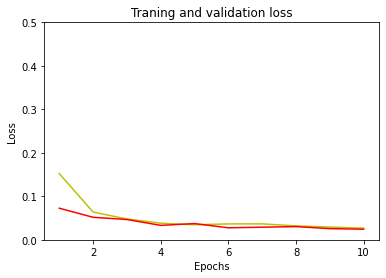

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,'y',label='Tranning loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.show()

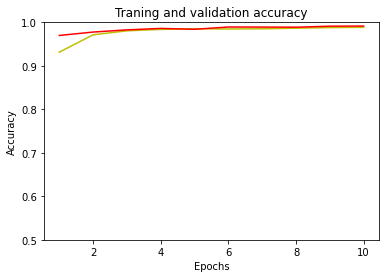

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Traning and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.show()

[[5847    1    0    8]
 [   0 5604  154    3]
 [   0   15 5766   13]
 [   4    0    0 5840]]


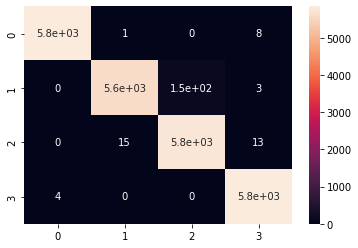

In [23]:
#Confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)